### 1. Load The Credit Card Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/BankChurners.csv')

In [3]:
df.shape

(10127, 23)

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# examine Income_Category values
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [6]:
# Remove $ symbol
df['Income_Category'] = df.Income_Category.str.replace('$', '')

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than 40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


###  2. Number of Missing Values by Column

In [8]:
# There was no missing value in any column
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### 3. Categorical Features

In [9]:
df.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,60K - 80K,Blue
1,Existing Customer,F,Graduate,Single,Less than 40K,Blue
2,Existing Customer,M,Graduate,Married,80K - 120K,Blue
3,Existing Customer,F,High School,Unknown,Less than 40K,Blue
4,Existing Customer,M,Uneducated,Married,60K - 80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,40K - 60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,40K - 60K,Blue
10124,Attrited Customer,F,High School,Married,Less than 40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,40K - 60K,Blue


#### 3.1 Attrition_Flag - Target Feature

In [10]:
# Examine Attrition_Flag feature, no missing value on target feature
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### 3.2 Gender

In [11]:
# Examine Gender feature
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

#### 3.3 Education_Level

In [12]:
# Examine Education_Level feature
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [13]:
# Examine Unkown value; looks like values were missing randomly
df[df.Education_Level == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10089,720328983,Attrited Customer,52,F,5,Unknown,Married,Less than 40K,Blue,36,...,9611.0,0,9611.0,0.840,7636,64,0.829,0.000,0.997100,0.002904
8825,718304583,Attrited Customer,43,M,2,Unknown,Married,60K - 80K,Gold,33,...,34516.0,1085,33431.0,1.047,4805,54,0.588,0.031,0.995630,0.004370
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,80K - 120K,Blue,37,...,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
8965,751974258,Existing Customer,51,M,3,Unknown,Unknown,120K +,Blue,44,...,11954.0,0,11954.0,0.779,7345,93,0.550,0.000,0.000218,0.999780
5376,716716083,Existing Customer,58,M,3,Unknown,Single,80K - 120K,Blue,36,...,3355.0,1878,1477.0,0.725,4578,84,0.953,0.560,0.000218,0.999780
3425,788912658,Existing Customer,44,F,2,Unknown,Married,Less than 40K,Blue,30,...,3734.0,0,3734.0,0.954,3144,62,0.722,0.000,0.000174,0.999830
4992,711918033,Attrited Customer,37,F,3,Unknown,Married,Less than 40K,Blue,17,...,1468.0,1074,394.0,0.697,2050,32,0.524,0.732,0.990630,0.009370
5260,741778458,Existing Customer,54,F,2,Unknown,Single,Less than 40K,Blue,47,...,2341.0,1550,791.0,0.656,3406,57,1.478,0.662,0.000210,0.999790
3088,783366483,Existing Customer,44,F,3,Unknown,Married,Unknown,Blue,38,...,11474.0,1063,10411.0,0.686,3242,74,0.451,0.093,0.000345,0.999650
750,772684833,Existing Customer,32,F,1,Unknown,Married,Less than 40K,Blue,22,...,2642.0,2035,607.0,1.119,1761,42,0.909,0.770,0.000186,0.999810


In [14]:
# Missing value on target feature
df.loc[df.Education_Level == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    1263
Attrited Customer     256
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


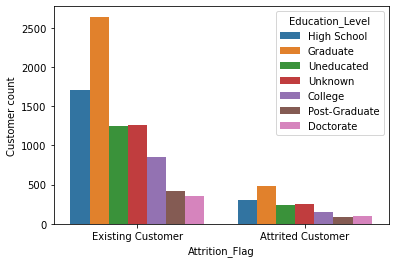

In [15]:
# Seems like there was no clear relationship between Educational_Level and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Education_Level',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.4 Marital_Status

In [16]:
#Examine Marital_Status feature
df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [17]:
# Examine Unkown value; looks like values were missing randomly
df[df.Marital_Status == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
2734,755365233,Existing Customer,34,M,1,Graduate,Unknown,60K - 80K,Blue,27,...,19900.0,1581,18319.0,0.838,3948,96,0.846,0.079,0.000307,0.99969
5257,815525508,Existing Customer,46,F,3,High School,Unknown,Less than 40K,Blue,41,...,1515.0,0,1515.0,0.819,3894,60,0.818,0.000,0.000159,0.99984
726,717418158,Existing Customer,42,M,5,Unknown,Unknown,120K +,Blue,36,...,34516.0,1839,32677.0,0.690,1230,34,0.889,0.053,0.000063,0.99994
1497,778275783,Existing Customer,37,F,2,Unknown,Unknown,Less than 40K,Blue,27,...,2868.0,1434,1434.0,0.777,2909,64,0.488,0.500,0.000061,0.99994
4383,711286533,Existing Customer,43,M,3,Graduate,Unknown,60K - 80K,Blue,31,...,13448.0,0,13448.0,0.667,5067,62,0.722,0.000,0.000057,0.99994
7570,708450033,Existing Customer,43,F,3,High School,Unknown,Less than 40K,Blue,13,...,2605.0,2269,336.0,0.881,5298,79,0.837,0.871,0.000069,0.99993
5648,709688883,Attrited Customer,45,M,3,High School,Unknown,80K - 120K,Blue,36,...,3845.0,0,3845.0,0.595,2174,39,0.393,0.000,0.994520,0.00548
5038,797495958,Existing Customer,42,F,3,Unknown,Unknown,40K - 60K,Blue,36,...,3015.0,0,3015.0,0.927,4277,80,0.951,0.000,0.000130,0.99987
9295,719324658,Existing Customer,27,M,0,College,Unknown,80K - 120K,Silver,19,...,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033,0.000070,0.99993
26,720466383,Existing Customer,59,M,1,High School,Unknown,40K - 60K,Blue,46,...,14784.0,1374,13410.0,0.921,1197,23,1.300,0.093,0.000050,0.99995


In [18]:
# Missing value on target feature
df.loc[df.Marital_Status == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    620
Attrited Customer    129
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


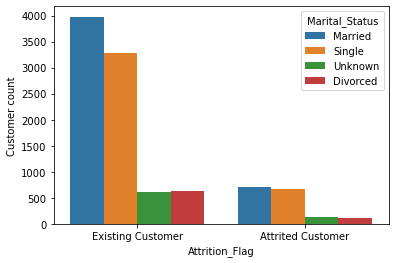

In [19]:
# Seems like there was no clear relationship between Marital_Status and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Marital_Status',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.5 Income_Category

In [20]:
#Examine Income_Category feature
df.Income_Category.value_counts()

Less than 40K    3561
40K - 60K        1790
80K - 120K       1535
60K - 80K        1402
Unknown          1112
120K +            727
Name: Income_Category, dtype: int64

In [21]:
# Examine Unkown value; looks like values were missing randomly
df[df.Income_Category == 'Unknown'].sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1636,715457658,Existing Customer,29,F,1,Graduate,Married,Unknown,Blue,19,...,1709.0,1465,244.0,0.558,1757,48,0.548,0.857,0.000484,0.999520
8820,711736083,Attrited Customer,47,F,4,College,Divorced,Unknown,Blue,36,...,6769.0,274,6495.0,0.998,4885,54,0.350,0.040,0.996770,0.003231
8793,709238358,Existing Customer,51,F,0,Uneducated,Married,Unknown,Blue,39,...,19387.0,810,18577.0,0.746,7604,87,0.642,0.042,0.000159,0.999840
4477,720182658,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,31,...,18056.0,940,17116.0,0.629,4473,72,0.600,0.052,0.000204,0.999800
886,708655983,Existing Customer,49,F,3,High School,Divorced,Unknown,Blue,40,...,5267.0,0,5267.0,0.442,1353,24,0.263,0.000,0.000181,0.999820
3479,708784908,Existing Customer,47,F,3,Graduate,Unknown,Unknown,Blue,34,...,18064.0,2039,16025.0,0.890,4435,88,0.796,0.113,0.000164,0.999840
2787,708132783,Existing Customer,47,F,3,Uneducated,Single,Unknown,Blue,42,...,16411.0,1179,15232.0,0.849,3929,71,0.732,0.072,0.000121,0.999880
6200,752766783,Existing Customer,43,F,4,Graduate,Divorced,Unknown,Blue,36,...,11536.0,2074,9462.0,0.549,4106,81,0.723,0.180,0.000119,0.999880
3594,711275433,Attrited Customer,47,M,4,Uneducated,Unknown,Unknown,Blue,36,...,18873.0,0,18873.0,0.636,2021,38,0.520,0.000,0.996940,0.003055
2209,788810658,Existing Customer,37,F,1,College,Single,Unknown,Blue,20,...,9466.0,0,9466.0,0.818,2503,70,0.489,0.000,0.000516,0.999480


In [22]:
# Missing value on target feature
df.loc[df.Income_Category == 'Unknown', 'Attrition_Flag'].value_counts()

Existing Customer    925
Attrited Customer    187
Name: Attrition_Flag, dtype: int64

C:\Users\vumac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


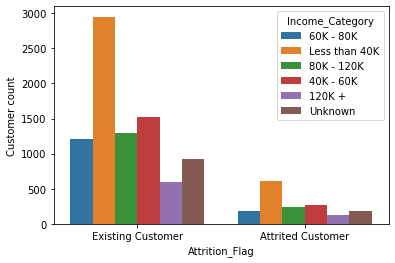

In [23]:
# Seems like there was no clear relationship between Income_Category and Attrition_Flag
sns.countplot('Attrition_Flag',hue='Income_Category',data=df)
plt.ylabel('Customer count')
plt.show()

#### 3.6 Card_Category

In [24]:
#Examine Card_Category feature
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [25]:
# Number of churning customers per card category
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() 

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

In [26]:
# Percentage of churning customers by card category. 
# Platinum seems to have a higher churning rate, but there was only 20 cards. The sample was too small to know.
df.loc[df.Attrition_Flag == 'Attrited Customer', 'Card_Category'].value_counts() / df.Card_Category.value_counts()

Blue        0.160979
Silver      0.147748
Gold        0.181034
Platinum    0.250000
Name: Card_Category, dtype: float64

### 4. Numeric Features

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [28]:
# Remove CLIENTNUM and last 2 columns (to ignore the Naive_Bayes columns as per the author of the dataset)
df1 = df.iloc[:, 1:-2]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.00,0.76,0.22,0.00,0.63,0.74,0.86,3.40


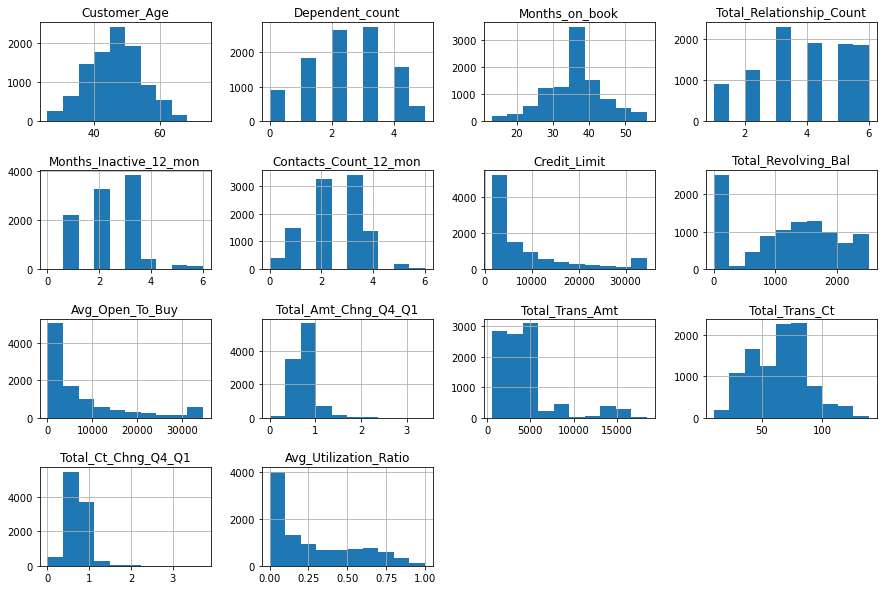

In [29]:
df1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### 4.1 Months_on_book

In [30]:
# Number of accounts with 36 months on book was about 7 times higher than the second most frequent value.
# Was there really an enormous credit cards opened 36 months ago?
# Or there was an error in data input?
# Should have confirmed with the database manager or credit cards department
df1.Months_on_book.value_counts().head()

36    2463
37     358
34     353
38     347
39     341
Name: Months_on_book, dtype: int64

In [31]:
# Mean was also 36 months
df1.Months_on_book.mean()

35.928409203120374

<AxesSubplot:>

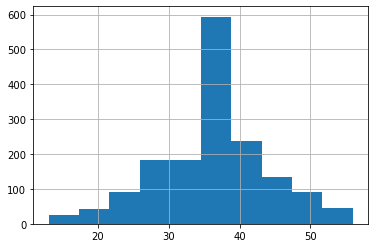

In [32]:
# Months_on_book of Attrited Customer - distribution looks identical to Months_on_book for total customers
df1.loc[df1.Attrition_Flag=='Attrited Customer', 'Months_on_book'].hist()

#### 4.2 Month_inactive_12_mon

In [33]:
# Looks like inactive account for 6 months will be closed
df1.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [34]:
# Users with 3-4 months of inactive have a high chance of leaving the services
df1.groupby(['Attrition_Flag','Months_Inactive_12_mon'])['Card_Category'].count()

Attrition_Flag     Months_Inactive_12_mon
Attrited Customer  0                           15
                   1                          100
                   2                          505
                   3                          826
                   4                          130
                   5                           32
                   6                           19
Existing Customer  0                           14
                   1                         2133
                   2                         2777
                   3                         3020
                   4                          305
                   5                          146
                   6                          105
Name: Card_Category, dtype: int64

In [35]:
# Users with 3-4 months of inactive have a high chance of leaving the services
df1[df1.Attrition_Flag=='Attrited Customer']['Months_Inactive_12_mon'].value_counts() / df1.Months_Inactive_12_mon.value_counts()

0   0.52
1   0.04
2   0.15
3   0.21
4   0.30
5   0.18
6   0.15
Name: Months_Inactive_12_mon, dtype: float64

#### 4.3 Credit_Limit

In [36]:
# Looks like $34,516 and $1,438.30 were the upper and lower limit of credit cards 
df1.Credit_Limit.value_counts().head()

34516.00    508
1438.30     507
15987.00     18
9959.00      18
23981.00     12
Name: Credit_Limit, dtype: int64

In [37]:
# $34,516 was the maximum credit limit given to credit cards
df1.loc[df1.Credit_Limit>34516]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [38]:
# Around 200 Blue cards have the maximum limit
df1.loc[df1.Credit_Limit==34516, 'Card_Category'].value_counts()

Silver      221
Blue        198
Gold         74
Platinum     15
Name: Card_Category, dtype: int64

In [39]:
# $1,438.30 was the minimum credit limit credit cards
df1.loc[df1.Credit_Limit<1438.30]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [40]:
# $1,438.30 was the minimum credit limit for Blue credit cards
df1.loc[df1.Credit_Limit==1438.30, 'Card_Category'].value_counts()

Blue    507
Name: Card_Category, dtype: int64

#### 4.4 Total_Revolving_Bal

In [41]:
# The maximum revolving balance was $2,517
df1.Total_Revolving_Bal.max()

2517

In [42]:
# around 24% card users paid off their credit card regularly. 5% card holders only paid the minimum requirement.
df1.Total_Revolving_Bal.value_counts().head()

0       2470
2517     508
1965      12
1480      12
1720      11
Name: Total_Revolving_Bal, dtype: int64

### 5. Save Data

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [44]:
df1.shape

(10127, 20)

In [72]:
df1.to_csv('Dataset/BankChurners_cleaned.csv')